### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [15]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4967,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,Male,21,Single,...,4~8,1~3,4~8,1~3,1,1,0,0,1,1
6472,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,26,Single,...,less1,1~3,less1,less1,1,1,0,0,1,0
9647,No Urgent Place,Friend(s),Rainy,55,10PM,Restaurant(20-50),2h,Male,21,Single,...,4~8,4~8,1~3,NaN,1,1,0,0,1,1
9090,No Urgent Place,Friend(s),Sunny,30,10PM,Carry out & Take away,1d,Male,26,Married partner,...,never,1~3,less1,less1,1,1,0,0,1,1
10118,Work,Alone,Rainy,55,7AM,Bar,1d,Female,36,Married partner,...,4~8,4~8,4~8,1~3,1,1,1,0,1,1
4264,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,0,0,1,1
4683,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,1d,Male,31,Married partner,...,never,less1,less1,never,1,1,0,0,1,1
711,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,36,Unmarried partner,...,never,4~8,gt8,less1,1,1,0,0,1,1
5252,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,Female,26,Unmarried partner,...,less1,1~3,less1,never,1,0,0,1,0,0
8524,No Urgent Place,Friend(s),Sunny,30,10PM,Restaurant(<20),2h,Female,21,Married partner,...,1~3,4~8,4~8,never,1,0,0,0,1,0


In [23]:
filtered = data[['has_children', 'education', 'occupation', 'income', 'car', 'Bar']]
print(filtered)

       has_children                 education       occupation  \
0                 1  Some college - no degree       Unemployed   
1                 1  Some college - no degree       Unemployed   
2                 1  Some college - no degree       Unemployed   
3                 1  Some college - no degree       Unemployed   
4                 1  Some college - no degree       Unemployed   
...             ...                       ...              ...   
12679             0          Bachelors degree  Sales & Related   
12680             0          Bachelors degree  Sales & Related   
12681             0          Bachelors degree  Sales & Related   
12682             0          Bachelors degree  Sales & Related   
12683             0          Bachelors degree  Sales & Related   

                income  car    Bar  
0      $37500 - $49999  NaN  never  
1      $37500 - $49999  NaN  never  
2      $37500 - $49999  NaN  never  
3      $37500 - $49999  NaN  never  
4      $37500 - $49999

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

1. Drop car column as is never has a value. #df = df.drop(columns=['car'])
2. Some rows don't have enough data (Car, Bar, CoffeeHouse, CarryAway, RestrauntLessThan20, Restaurant20to50 to be valuable. #df = df.dropna(thresh=len(df.columns) - 3)
3. CarryAway and Restaurant20To50 has missing values #df = df.dropna(subset=['CarryAway', 'Restaurant20To50'])

In [61]:
# Step 1: Drop the 'car' column
data = data.drop(columns=['car'])

# Step 2: Drop rows with more than 5 missing values
data = data.dropna(thresh=len(data.columns) - 5)

# Step 3: Drop rows with missing values in 'CarryAway' or 'Restaurant20To50' columns
filtered_data = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50'])

print("\nFiltered DataFrame:")
print(filtered_data)


Filtered DataFrame:
           destination  passanger weather  temperature  time  \
22     No Urgent Place      Alone   Sunny           55   2PM   
23     No Urgent Place  Friend(s)   Sunny           80  10AM   
24     No Urgent Place  Friend(s)   Sunny           80  10AM   
25     No Urgent Place  Friend(s)   Sunny           80  10AM   
26     No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration gender age maritalStatus  ...  \
22           Restaurant(<20)         1d   Male  21        Single  ...   
23              Coffee House         2h   Male  21        Single

4. What proportion of the total observations chose to accept the coupon?



Acceptance Count: 6877
Acceptance Percent: 56.93%


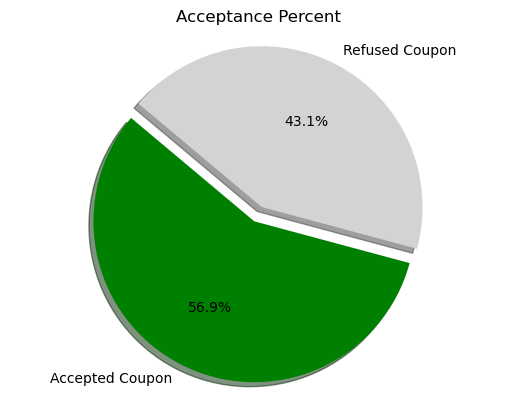

In [57]:
# Step 1: Filter out incomplete rows
data = data.dropna(thresh=len(data.columns) - 5)
data = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])

# Step 2: Count the number of rows that contain the value "1" in column "Y"
count_rows_with_1 = (data['Y'] == 1).sum()

# Step 3: Calculate the proportion of rows that contain the value "1" in column "Y"
proportion_with_1 = (data['Y'] == 1).mean()

print(f"Acceptance Count: {count_rows_with_1}")
print(f"Acceptance Percent: {proportion_with_1:.2%}")

# Pie Chart
labels = ['Accepted Coupon', 'Refused Coupon']
sizes = [proportion_with_1, 1 - proportion_with_1]
colors = ['green', 'lightgrey']
explode = (0.1, 0)  # explode the 1st slice (Acceptance Percent)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Acceptance Percent')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

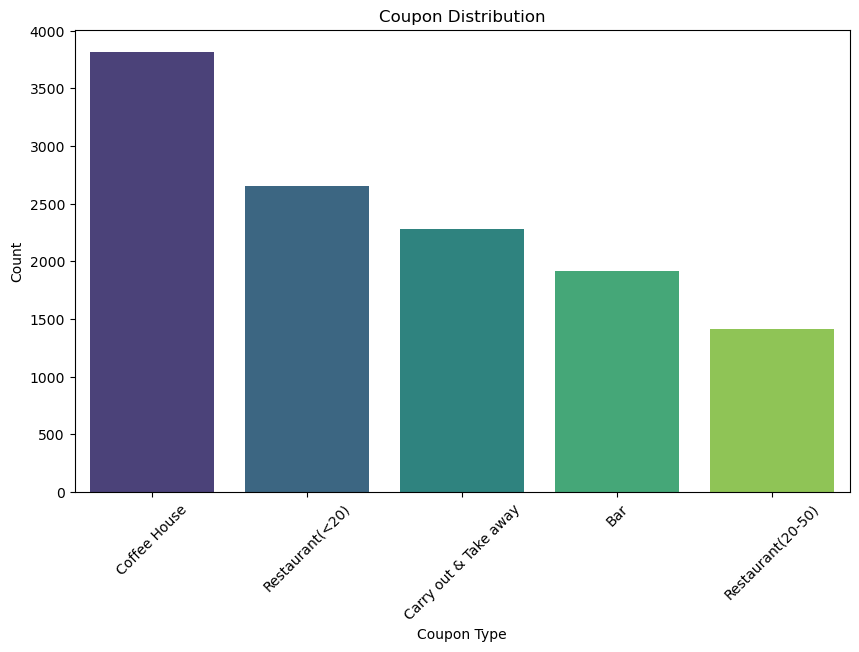

In [61]:
# Step 1: Filter out missing data
filtered_data = data.dropna(thresh=len(data.columns) - 5)
filtered_data = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])

# Step 2: Count each coupon type
coupon_counts = filtered_data['coupon'].value_counts().reset_index()
coupon_counts.columns = ['coupon', 'count']

# Step 3: Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='coupon', y='count', data=coupon_counts, hue='coupon', palette='viridis', legend=False)

# Step 4: Customize the plot
plt.title('Coupon Distribution')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

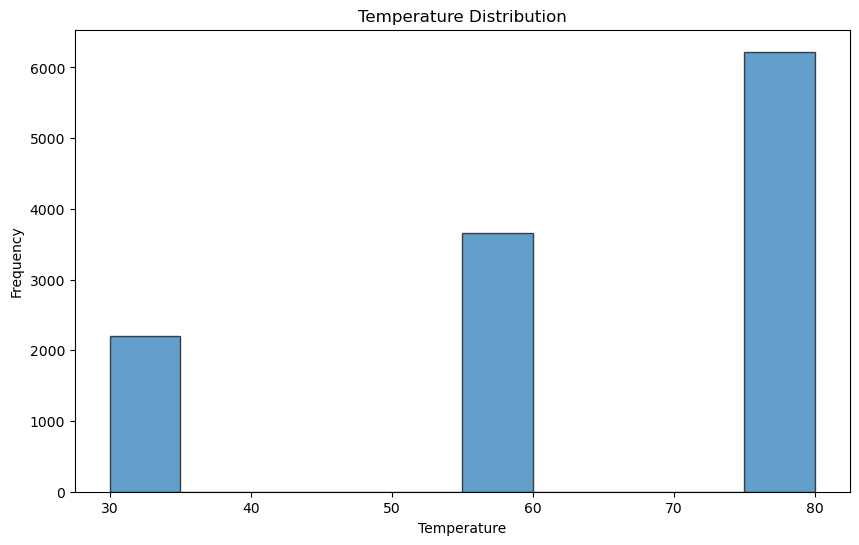

In [63]:
# Step 1 Create the histogram
plt.figure(figsize=(10, 6))
filtered_data['temperature'].hist(bins=10, edgecolor='black', alpha=0.7)

# Step 2 Customize the plot
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [67]:
#Create a new data frame with only rows where 'coupon' is 'Bar'
filtered_data_bar = filtered_data[filtered_data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [83]:
# Step 1: Filter out missing data
filtered_data = data.dropna(thresh=len(data.columns) - 5)
filtered_data = filtered_data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])

# Step 2: Create a new data frame with only rows where 'coupon' is 'Bar'
filtered_data_bar = filtered_data[filtered_data['coupon'] == 'Bar']

# Step 3: Calculate the proportion of rows in 'Y' that contain '1'
proportion_with_1 = (filtered_data_bar['Y'] == 1).mean()

# Step 4: Print the proportion as a percentage
print(f"\nProportion of rows with '1' in column 'Y': {proportion_with_1:.2%}")


Proportion of rows with '1' in column 'Y': 41.19%


In [ ]:
What proportion of cheap restaurant coupons where accepted?

In [93]:
# Step 1: Filter out missing data
filtered_data = data.dropna(thresh=len(data.columns) - 5)
filtered_data = filtered_data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])

# Step 2: Create a new data frame with only rows where 'coupon' is 'Restaurant(<20)'
filtered_data_restaurant = filtered_data[filtered_data['coupon'] == 'Restaurant(<20)']

# Step 3: Filter in rows where 'income' < 50k
data_filtered_income = filtered_data_restaurant[filtered_data_restaurant['income'].isin(['$37500 - $49999', 'Less than $12500', '$12500 - $24999', '$25000 - $37499'])]

# Step 4: Calculate the proportion of rows in 'Y' that contain '1'
proportion_with_1 = (data_filtered_income['Y'] == 1).mean()

# Step 5: Print the proportion as a percentage
print(f"\nProportion of rows with '1' in column 'Y': {proportion_with_1:.2%}")


Proportion of rows with '1' in column 'Y': 71.34%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [71]:
# Step 0: Filter incomplete data
filtered_data = data.dropna(thresh=len(data.columns) - 5)
filtered_data = filtered_data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])

# Step 1: Filter in rows where 'Bar' contains '1~3'
data_filtered_1_3 = filtered_data[filtered_data['Bar'] == '1~3']

# Step 2: Calculate the acceptance rate of rows where 'Y' equals 1 in the filtered data for '1~3'
acceptance_rate_1_3 = (data_filtered_1_3['Y'] == 1).mean()

# Step 3: Filter in rows where 'Bar' contains 'gt8' or '4~8'
data_filtered_4_8_gt8 = filtered_data[filtered_data['Bar'].isin(['gt8', '4~8'])]

# Step 4: Calculate the acceptance rate of rows where 'Y' equals 1 in the filtered data for 'gt8' or '4~8'
acceptance_rate_4_8_gt8 = (data_filtered_4_8_gt8['Y'] == 1).mean()

# Display the results
print(f"Acceptance rate of '1~3' times at a bar: {acceptance_rate_1_3:.2%}")
print(f"Acceptance rate of more than 3 times at a bar: {acceptance_rate_4_8_gt8:.2%}")

# Display the updated DataFrame
print("\nUpdated Data Frame:")
print(filtered_data)

Acceptance rate of '1~3' times at a bar: 62.49%
Acceptance rate of more than 3 times at a bar: 62.13%

Updated Data Frame:
           destination  passanger weather  temperature  time  \
22     No Urgent Place      Alone   Sunny           55   2PM   
23     No Urgent Place  Friend(s)   Sunny           80  10AM   
24     No Urgent Place  Friend(s)   Sunny           80  10AM   
25     No Urgent Place  Friend(s)   Sunny           80  10AM   
26     No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration gender age maritalStatus  ...  \
22           Restaurant(<20)       

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [75]:
# Step 0: Filter incomplete data
filtered_data = data.dropna(thresh=len(data.columns) - 5)
filtered_data = filtered_data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])

# Step 1: Filter in rows where 'Bar' contains '1~3', '4~8', or 'gt8'
data_filtered_bar = filtered_data[filtered_data['Bar'].isin(['1~3', '4~8', 'gt8'])]

# Step 2: Further filter the data where 'age' contains '46', '26', '31', '41', '50plus', or '36'
data_filtered = data_filtered_bar[data_filtered_bar['age'].isin(['46', '26', '31', '41', '50plus', '36'])]

# Step 3: Calculate the acceptance rate of the filtered data
acceptance_rate_filtered = (data_filtered['Y'] == 1).mean()

# Step 4: Calculate the acceptance rate of the total population
acceptance_rate_total = (filtered_data['Y'] == 1).mean()

# Display the results
print(f"Acceptance rate of filtered data with 'Y' = 1: {acceptance_rate_filtered:.2%}")
print(f"Acceptance rate of total population with 'Y' = 1: {acceptance_rate_total:.2%}")

# Display the updated DataFrame
print("\nUpdated Data Frame:")
print(data_filtered)

Acceptance rate of filtered data with 'Y' = 1: 62.30%
Acceptance rate of total population with 'Y' = 1: 56.93%

Updated Data Frame:
           destination  passanger weather  temperature  time  \
110    No Urgent Place      Alone   Sunny           55   2PM   
111    No Urgent Place  Friend(s)   Sunny           80  10AM   
112    No Urgent Place  Friend(s)   Sunny           80  10AM   
113    No Urgent Place  Friend(s)   Sunny           80  10AM   
114    No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12497             Home    Partner   Rainy           55   6PM   
12498             Work      Alone   Rainy           55   7AM   
12499             Work      Alone   Snowy           30   7AM   
12500             Work      Alone   Snowy           30   7AM   
12501             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
110          Restaur

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Acceptance rate of filtered data with 'Y' = 1: 62.31%
Acceptance rate of total population with 'Y' = 1: 56.84%

Updated Data Frame:
           destination  passanger weather  temperature  time  \
88     No Urgent Place      Alone   Sunny           55   2PM   
89     No Urgent Place  Friend(s)   Sunny           80  10AM   
90     No Urgent Place  Friend(s)   Sunny           80  10AM   
91     No Urgent Place  Friend(s)   Sunny           80  10AM   
92     No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12541             Work      Alone   Rainy           55   7AM   
12542             Work      Alone   Snowy           30   7AM   
12543             Work      Alone   Snowy           30   7AM   
12544             Work      Alone   Snowy           30   7AM   
12545             Work      Alone   Sunny           80   7AM   

                      coupon expiration gender age      maritalStatus  ...  \
88           Restaura

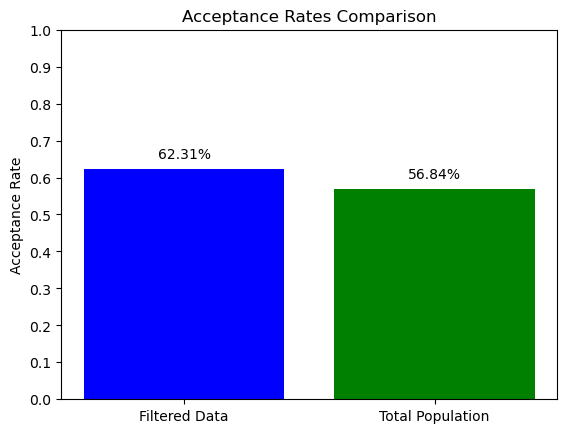

In [35]:
# Step 1: Filter in rows where 'Bar' contains '1~3', '4~8', or 'gt8'
data_filtered_bar = data[data['Bar'].isin(['1~3', '4~8', 'gt8'])]

# Step 2: Filter out rows where 'passanger' contains 'Kid(s)'
data_filtered_passanger = data_filtered_bar[~data_filtered_bar['passanger'].str.contains('Kid(s)', regex=False)]

# Step 3: Filter out rows where 'occupation' is 'farming', 'fishing', or 'forestry'
data_filtered = data_filtered_passanger[~data_filtered_passanger['occupation'].isin(['farming', 'fishing', 'forestry'])]

# Step 4: Calculate the acceptance rate of the filtered data
acceptance_rate_filtered = (data_filtered['Y'] == 1).mean()

# Step 5: Calculate the acceptance rate of the total population
acceptance_rate_total = (data['Y'] == 1).mean()

# Display the results
print(f"Acceptance rate of filtered data with 'Y' = 1: {acceptance_rate_filtered:.2%}")
print(f"Acceptance rate of total population with 'Y' = 1: {acceptance_rate_total:.2%}")

# Display the updated DataFrame
print("\nUpdated Data Frame:")
print(data_filtered)

# Bar Chart
labels = ['Filtered Data', 'Total Population']
acceptance_rates = [acceptance_rate_filtered, acceptance_rate_total]

fig, ax = plt.subplots()
ax.bar(labels, acceptance_rates, color=['blue', 'green'])
ax.set_ylabel('Acceptance Rate')
ax.set_title('Acceptance Rates Comparison')
ax.set_ylim(0, 1)  # Set y-axis limit to 0-1 for percentage representation
ax.set_yticks([i/10 for i in range(11)])  # Set y-axis ticks from 0 to 1

# Display the acceptance rates on top of the bars
for i, v in enumerate(acceptance_rates):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', va='bottom')

plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Go to bars more than once a month, had passengers that were not a kid, and were not widowed: 62.31%
Go to bars more than once a month and are under the age of 30: 62.81%
Go to cheap restaurants more than 4 times a month and income is less than 50K: 59.40%
Acceptance rate of total population: 56.84%

Updated Data Frame for Bars:
           destination  passanger weather  temperature  time  \
88     No Urgent Place      Alone   Sunny           55   2PM   
89     No Urgent Place  Friend(s)   Sunny           80  10AM   
90     No Urgent Place  Friend(s)   Sunny           80  10AM   
91     No Urgent Place  Friend(s)   Sunny           80  10AM   
92     No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12541             Work      Alone   Rainy           55   7AM   
12542             Work      Alone   Snowy           30   7AM   
12543             Work      Alone   Snowy           30   7AM   
12544             Work      Al

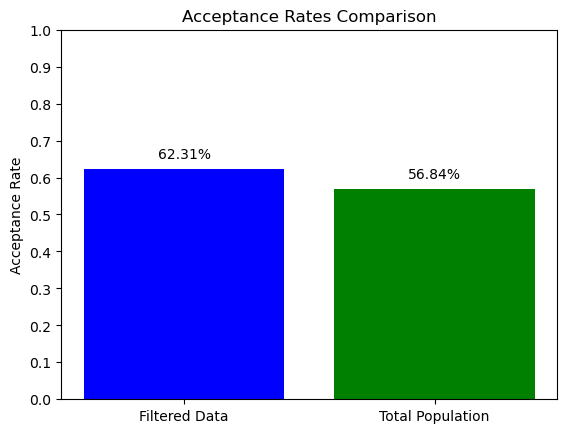

In [41]:
# Step 1: Filter in rows where 'Bar' contains '1~3', '4~8', or 'gt8'
data_filtered_bar = data[data['Bar'].isin(['1~3', '4~8', 'gt8'])]

# Step 2: Filter out rows where 'passanger' contains 'Kid(s)'
data_filtered_passenger = data_filtered_bar[~data_filtered_bar['passanger'].str.contains('Kid(s)', regex=False)]

# Step 3: Filter out rows where 'maritalStatus' is 'Widowed'
data_filtered = data_filtered_passenger[~data_filtered_passenger['maritalStatus'].str.contains('Widowed', regex=False)]

# Step 4: Calculate the acceptance rate of rows who go to bars more than once a month, had passengers that were not a kid, and were not widowed
acceptance_rate_filtered_bars = (data_filtered['Y'] == 1).mean()

# Step 5: Calculate the acceptance rate of the total population
acceptance_rate_total = (data['Y'] == 1).mean()

# Step 6: Filter go to bars more than once a month and are under the age of 30
data_filtered_age = data_filtered_bar[data_filtered_bar['age'].isin(['21', '26', 'below21'])]

# Step 7: Calculate the acceptance rate of the filtered data based on age
acceptance_rate_age_filtered = (data_filtered_age['Y'] == 1).mean()

# Step 8: Filter in rows where 'RestaurantLessThan20' contains '4~8' or 'gt8'
data_filtered_rest = data[data['RestaurantLessThan20'].isin(['4~8', 'gt8'])]

# Step 9: Filter in rows where 'income' contains '$37500 - $49999', '$12500 - $24999', or '$25000 - $37499'
data_filtered_income = data_filtered_rest[data_filtered_rest['income'].isin(['$37500 - $49999', '$12500 - $24999', '$25000 - $37499'])]

# Step 10: Calculate the acceptance rate of the filtered data for restaurants
acceptance_rate_filtered_rest = (data_filtered_income['Y'] == 1).mean()

# Display the results
print(f"Go to bars more than once a month, had passengers that were not a kid, and were not widowed: {acceptance_rate_filtered_bars:.2%}")
print(f"Go to bars more than once a month and are under the age of 30: {acceptance_rate_age_filtered:.2%}")
print(f"Go to cheap restaurants more than 4 times a month and income is less than 50K: {acceptance_rate_filtered_rest:.2%}")
print(f"Acceptance rate of total population: {acceptance_rate_total:.2%}")

# Display the updated DataFrames
print("\nUpdated Data Frame for Bars:")
print(data_filtered)

print("\nUpdated Data Frame for Restaurants:")
print(data_filtered_income)

# Bar Chart
labels = ['Filtered Data', 'Total Population']
acceptance_rates = [acceptance_rate_filtered_bars, acceptance_rate_total]

fig, ax = plt.subplots()
ax.bar(labels, acceptance_rates, color=['blue', 'green'])
ax.set_ylabel('Acceptance Rate')
ax.set_title('Acceptance Rates Comparison')
ax.set_ylim(0, 1)  # Set y-axis limit to 0-1 for percentage representation
ax.set_yticks([i/10 for i in range(11)])  # Set y-axis ticks from 0 to 1

# Display the acceptance rates on top of the bars
for i, v in enumerate(acceptance_rates):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', va='bottom')

plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers that are have no kids, lower income have higher likelihood of accepting a coupon. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

a.	Drivers that went to less expensive restaurants (Restaurant(<20)) more likely to accept a coupon. 
b.	Lower income below <50 also more likely to accept a coupon. 
c.	Filtering on both shows 71.34% acceptance.